In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [13]:
genome = 'mm10'

# get Peak tensor
infile = f'../results/{genome}/Peak_tensors/Window_pm5kb/PeakCenter_mean_sparse_tensor_prom_tf_position.pt'
Peaks = torch.load(infile) # Promoter x TF x Position
print('Peaks:',Peaks.shape)

# get the promoterome
infile = f'~/Promoterome/results/{genome}/promoterome_pm5kb_filtered_clustered_sorted.bed'
promoterome = pd.read_csv(infile, sep='\t')
print('Promoterome:',promoterome.shape[0])

# get the TFs
infile = f'../resources/experimentList_v3_{genome}_TFs_only_QC_filtered.tab'
experiment_tf = pd.read_csv(infile,sep='\t',usecols=[0,3])
experiment_tf.columns = ['id','antigen']
TFs = experiment_tf.antigen.unique()
print('TFs:',len(TFs))

/tmp/ipykernel_505267/2485992458.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Peaks = torch.load(infile) # Promoter x TF x Position


Peaks: torch.Size([24424, 711, 10000])
Promoterome: 24424
TFs: 711


In [67]:
P.shape

(1426, 10000)

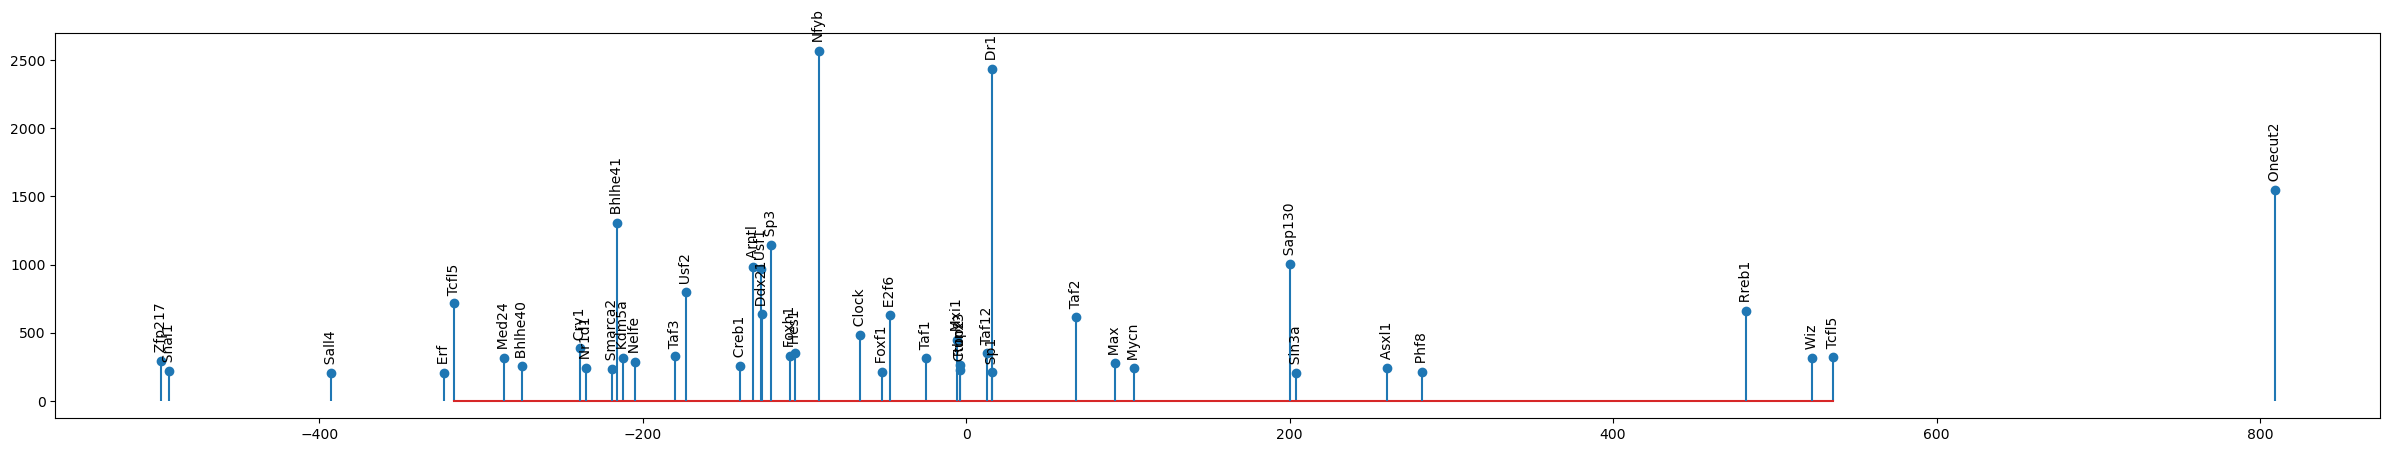

In [15]:
my_gene = 'Cry1'
idx = promoterome[promoterome['gene']==my_gene].index[0]
P = Peaks[idx].to_dense().numpy()
my_tfs = np.where( (P>0).any(1) )[0]

th = 200 # threshold
window = 1000
xlim = [5000 - window,5000 + window]
P = P[:,xlim[0]:xlim[1]]

fig, ax = plt.subplots(figsize=(30,5))
for tf in my_tfs:
    p = P[tf,:]
    x = np.where(p>th)[0] - window
    y = p[p>th]
    if len(x)>0:
        ax.stem(x,y)
        for i in range(len(x)):
            ax.text(x[i],y[i],'  '+TFs[tf],rotation=90,verticalalignment='bottom',horizontalalignment='center')
    

In [63]:
x

array([], dtype=float64)

In [55]:
X[my_tfs,:].max(1)

array([ 680.45611015,   94.        ,  205.38391778,  284.10233918,
        218.        ,  242.        ,  126.        ,  237.62661738,
        225.        ,  532.        ,  105.1994382 ,  724.17431193,
        118.        ,   62.        ,  446.        ,  133.        ,
        385.38265306,  699.        ,  180.        ,  299.11474164,
        177.        ,  130.        ,  156.00645161,  355.08052775,
        600.7260755 ,   85.05108798,  118.        ,  313.9884058 ,
        180.28792171,  530.92719669,  161.40909091, 2320.        ,
        410.17777778, 1303.12148876,  214.        ,  191.56457565,
        143.0459144 ,  109.        ,  189.        ,  164.1742671 ,
        144.        ,  438.36887052,  912.68701299,  384.00840336,
        247.88888889,  259.54231975,  825.34967246,  619.11029412,
         73.        ,  409.        ,  303.82146439,  161.        ,
        102.        ,  111.        ,  283.        ,  684.2718894 ,
        124.        ,  455.14285714,  570.57293606,  105.     

In [11]:
promoterome

,chr,start,end,strand,black_listed,gene,id
0,chr1,918923,928923,+,.,SAMD11,chr1_+_923914_923933
1,chr1,920735,930735,+,.,SAMD11,chr1_+_925715_925756
2,chr1,934273,944273,+,.,SAMD11,chr1_+_939266_939280
3,chr1,954261,964261,-,.,NOC2L,chr1_-_959240_959282
4,chr1,955601,965601,+,.,KLHL17,chr1_+_960549_960653
...,...,...,...,...,...,...,...
25576,chrY,24829009,24839009,+,.,DAZ4,chrY_+_24833843_24833940|chrY_+_24834127_24834127
25577,chrY,25039023,25049023,-,.,BPY2C,chrY_-_25044023_25044023
25578,chrY,25047104,25057104,-,.,BPY2C,chrY_-_25052104_25052104
25579,chrY,25057548,25067548,-,.,BPY2C,chrY_-_25062548_25062548
